In [12]:
# 필요한 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [8]:
# 데이터 호출
df = pd.read_csv('new_data.csv')
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357142,12
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,12
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,12
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,12


- 스케일 변환 필요. 정규화 혹은 표준화 중 하나를 택해야 함.
- 선택 기준:
    - 데이터 분포: 데이터가 정규분포와 유사한 경우, 표준화를 고려할 수 있습니다. 정규분포와 차이가 크다면 정규화를 사용할 수 있습니다.

    - 모델 알고리즘: 일부 모델은 데이터의 스케일에 민감하게 반응합니다. 선형 회귀와 K-평균 군집화는 표준화가 유용할 수 있습니다. 신경망과 같은 딥러닝 모델에서는 표준화나 정규화를 사용하는 것이 일반적입니다.

    - 이상치의 존재: 이상치가 있는 경우 표준화가 더 안정적일 수 있습니다. 이상치에 민감한 모델에서는 표준화가 유용할 수 있습니다.

    - 알고리즘의 요구사항: 몇몇 알고리즘은 입력 데이터의 스케일을 일반화하면 성능이 향상될 수 있습니다.
- 우선 분포가 정규 분포를 따르지 않고 있으니, 정규화 진행

In [9]:
# 정규화(Normalization) 수행
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)

# 스케일 조정된 값을 가진 새로운 데이터프레임 생성
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)

In [10]:
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.068841,0.048302,0.073254,0.000000,0.0
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.450000,0.4,0.000000,0.503623,0.982075,0.563132,0.622222,0.0
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.292683,0.539855,0.148894,0.329410,0.000000,0.0
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.150000,0.1,0.024390,0.539855,0.000000,0.453830,0.000000,0.0
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.000000,0.0,0.024390,0.083333,0.162362,0.128543,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.005765,1.000000,0.107192,0.000000,0.248482,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.077932,0.025663,1.000000,0.0
8946,0.003881,1.000000,0.110462,0.000000,0.256061,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.066028,0.453830,0.000000,0.0
8947,0.004734,0.399998,0.053169,0.000000,0.123251,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,0.121951,0.068841,0.019452,0.043272,0.700001,0.0
8948,0.002723,0.399998,0.000000,0.000000,0.000000,0.013129,0.000000,0.000000,0.000000,0.300001,0.2,0.000000,0.032609,0.012578,0.029270,0.700001,0.0


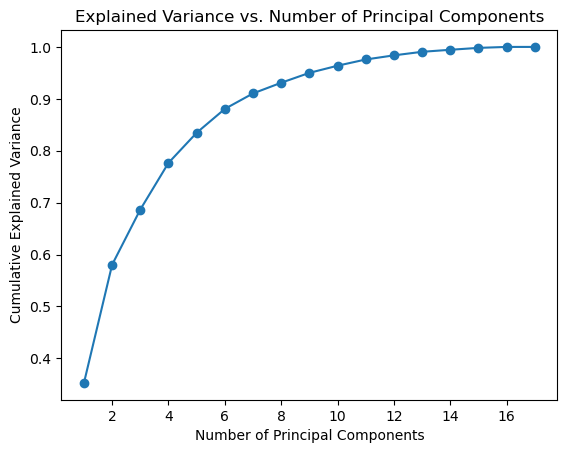

In [13]:
# 변수가 17개 -> PCA 진행 (차원 축소)

# PCA 모델 생성
pca = PCA()

# PCA 수행
pca.fit(scaled_df)

# 설명 분산 비율 시각화
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()


In [29]:
# PCA 모델 생성 및 주성분 수 지정

n_components = 6  # 주성분의 수를 지정
pca_0 = PCA(n_components=n_components)

# PCA 수행
principal_components = pca_0.fit_transform(df)

# 주성분으로 이루어진 새로운 데이터프레임 생성
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

pca_df


,PC1,PC2,PC3,PC4,PC5,PC6
0,-3930.063189,-562.933095,-513.074888,45.763504,-163.204523,-42.499656
1,3528.270511,2345.415740,810.037742,2001.750513,-603.811426,-67.321294
2,2987.670017,-501.365056,-1127.236466,-1073.452133,-191.597101,-552.218281
3,2794.805627,-1223.989631,-1004.007050,-1326.210006,854.143923,-655.849857
4,-3458.365724,106.592847,-319.893804,-83.375323,-524.698461,-201.270611
...,...,...,...,...,...,...
8945,-3894.282125,-604.703926,-281.982336,0.706702,-79.340445,86.597404
8946,-3851.323069,-411.123963,-328.064431,-163.986898,-154.861085,359.693865
8947,-3955.085171,-622.328429,-570.781457,-11.095915,-72.551902,-13.331870
8948,-4445.611462,-454.786578,-600.984492,64.919655,-119.210200,-142.770632


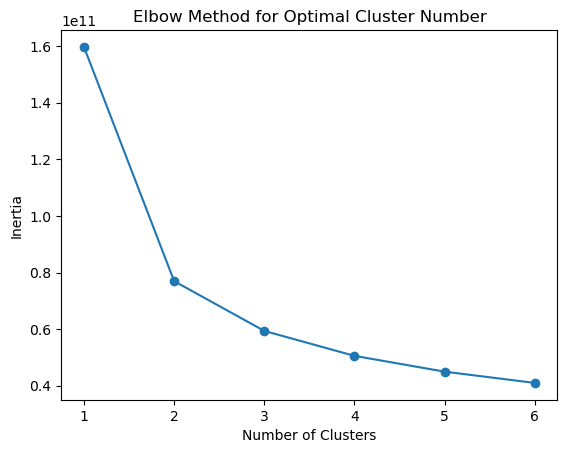

In [30]:
from sklearn.cluster import KMeans

# 엘보우 메서드로 적절한 클러스터 개수 찾기
inertia = []
for num_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

- 이너셔 값이 작을 수록 좋은 것. 

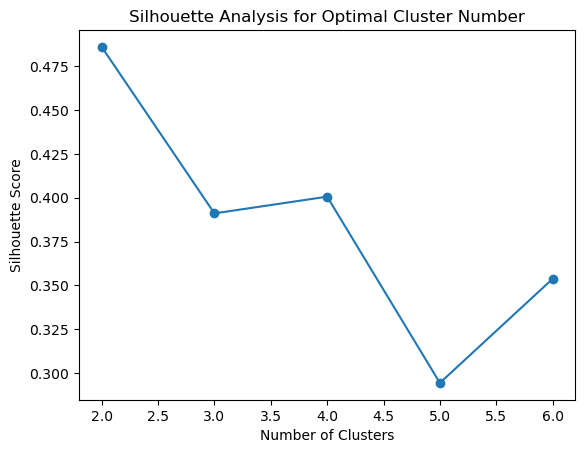

In [31]:
# 실루엣 계수도 참고하기
from sklearn.metrics import silhouette_score

# 실루엣 점수로 적절한 클러스터 개수 찾기
silhouette_scores = []
for num_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Cluster Number')
plt.show()


In [32]:
# 군집 분석 수행 (예시로 K-평균 군집화 사용)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(principal_components)

# 결과 출력
result_df = pd.DataFrame({'Cluster': cluster_labels})
result_df['Cluster'].value_counts()  # 각 클러스터의 개수 출력

3    5174
1    1674
0    1204
2     898
Name: Cluster, dtype: int64

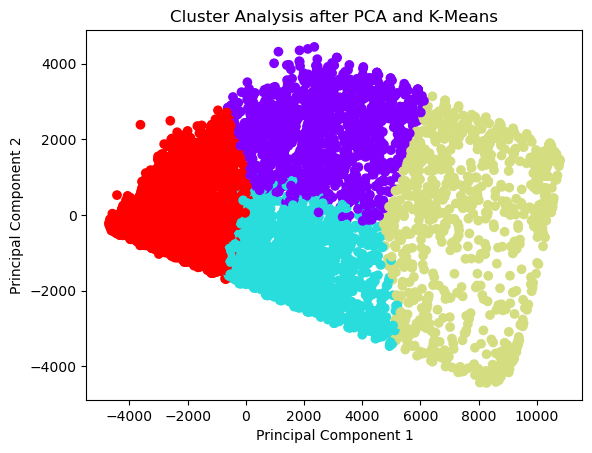

In [33]:
# 결과 시각화
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Analysis after PCA and K-Means')
plt.show()

In [39]:
# 군집 분석 결과 해석하기

# 각 클러스터 내 대표값 계산
cluster_representatives = []
for cluster_label in range(num_clusters):
    cluster_mask = (cluster_labels == cluster_label)
    cluster_data = df[cluster_mask]
    cluster_representative = cluster_data.mean(axis=0)
    cluster_representatives.append(cluster_representative)

# 대표값을 데이터프레임으로 만들기
cluster_representative_df = pd.DataFrame(cluster_representatives, columns=df.columns)

# 결과 출력
print(cluster_representative_df)

       BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  3757.114780           0.977704   658.696227        329.322814   
1   668.796257           0.925111  1250.315718        617.800143   
2  3110.527034           0.958231  1353.403516        705.963942   
3   774.772111           0.918326   482.418124        213.924935   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              240.886761   1928.186057             0.362881   
1              449.756480    196.375981             0.656112   
2              458.952660   1174.764889             0.594531   
3              230.011425    447.118013             0.448301   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.160374                          0.257495   
1                    0.318420                          0.466006   
2                    0.334274                          0.428437   
3                    0.121263                          0.345354   

  

In [40]:
# 원래 변수들과 클러스터 레이블을 합쳐서 새로운 데이터프레임 생성
df_clusters = pd.concat([df, pd.DataFrame({'cluster': cluster_labels})], axis=1)

# 결과 출력
print(df_clusters.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.722223    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

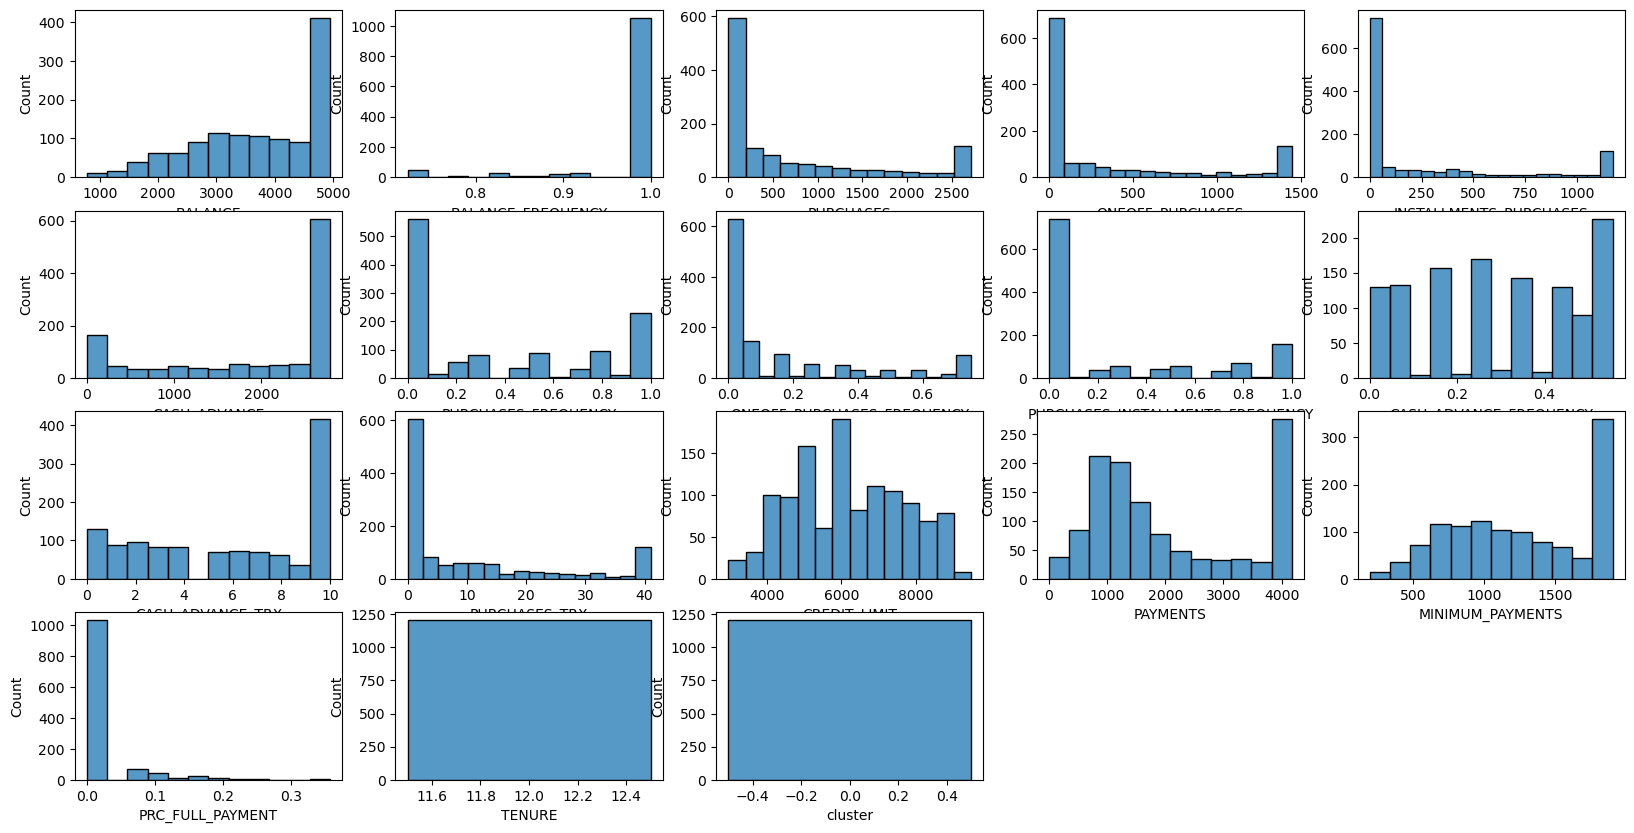

In [45]:
df_clusters0 = df_clusters[(df_clusters['cluster'] == 0)]
plt.figure(num=1, figsize=(20, 10))


for i in enumerate(df_clusters0):
    plt.subplot(4,5 ,i[0]+1)
    sns.histplot(df_clusters0[i[1]])

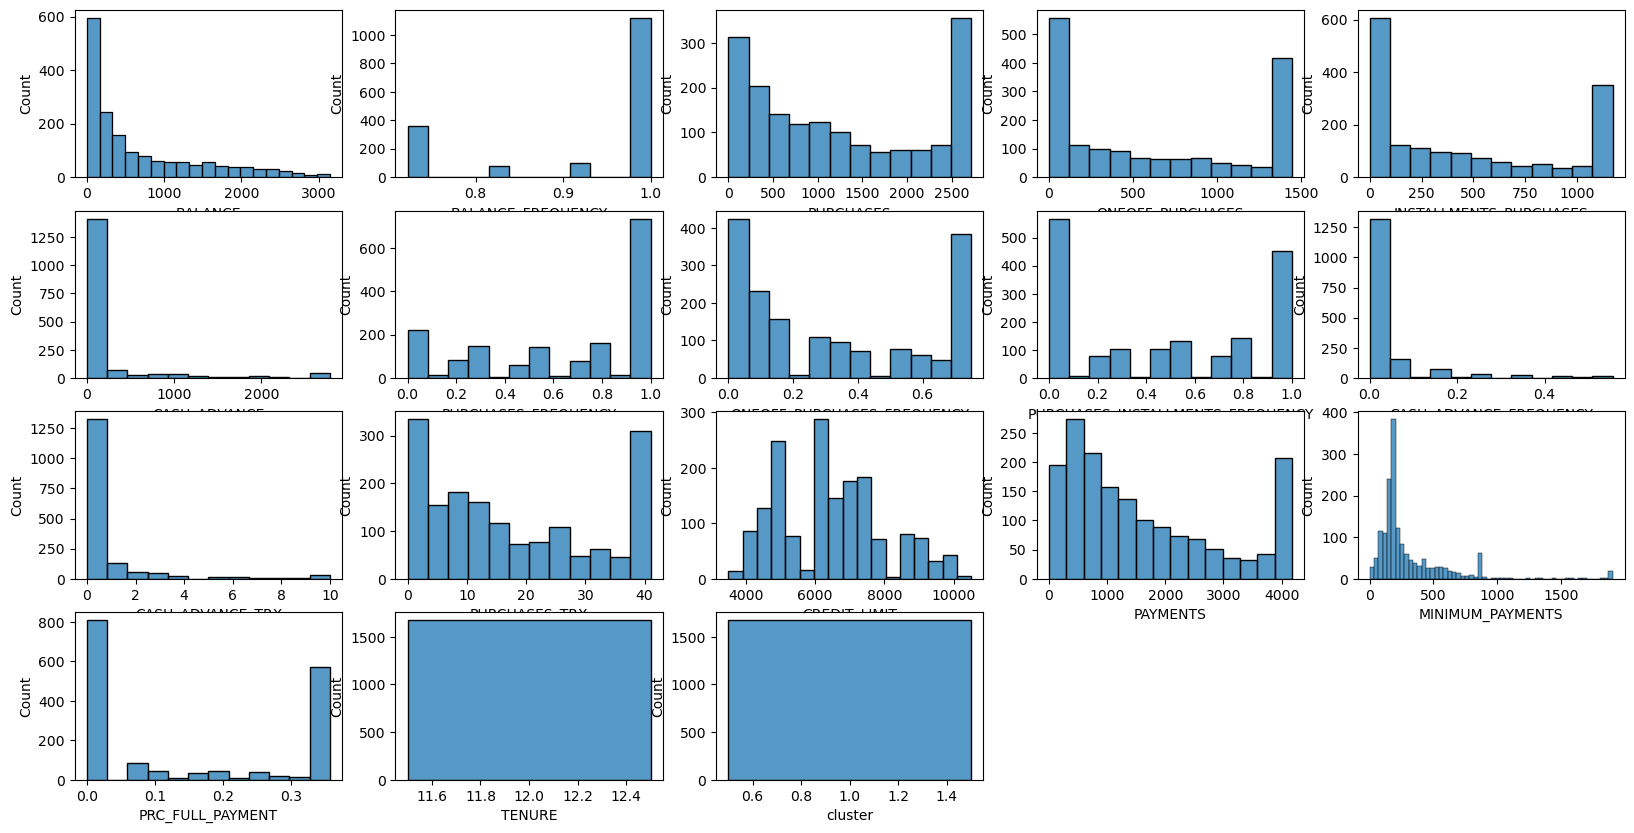

In [47]:
df_clusters1 = df_clusters[(df_clusters['cluster'] == 1)]
plt.figure(num=1, figsize=(20, 10))


for i in enumerate(df_clusters1):
    plt.subplot(4,5 ,i[0]+1)
    sns.histplot(df_clusters1[i[1]])

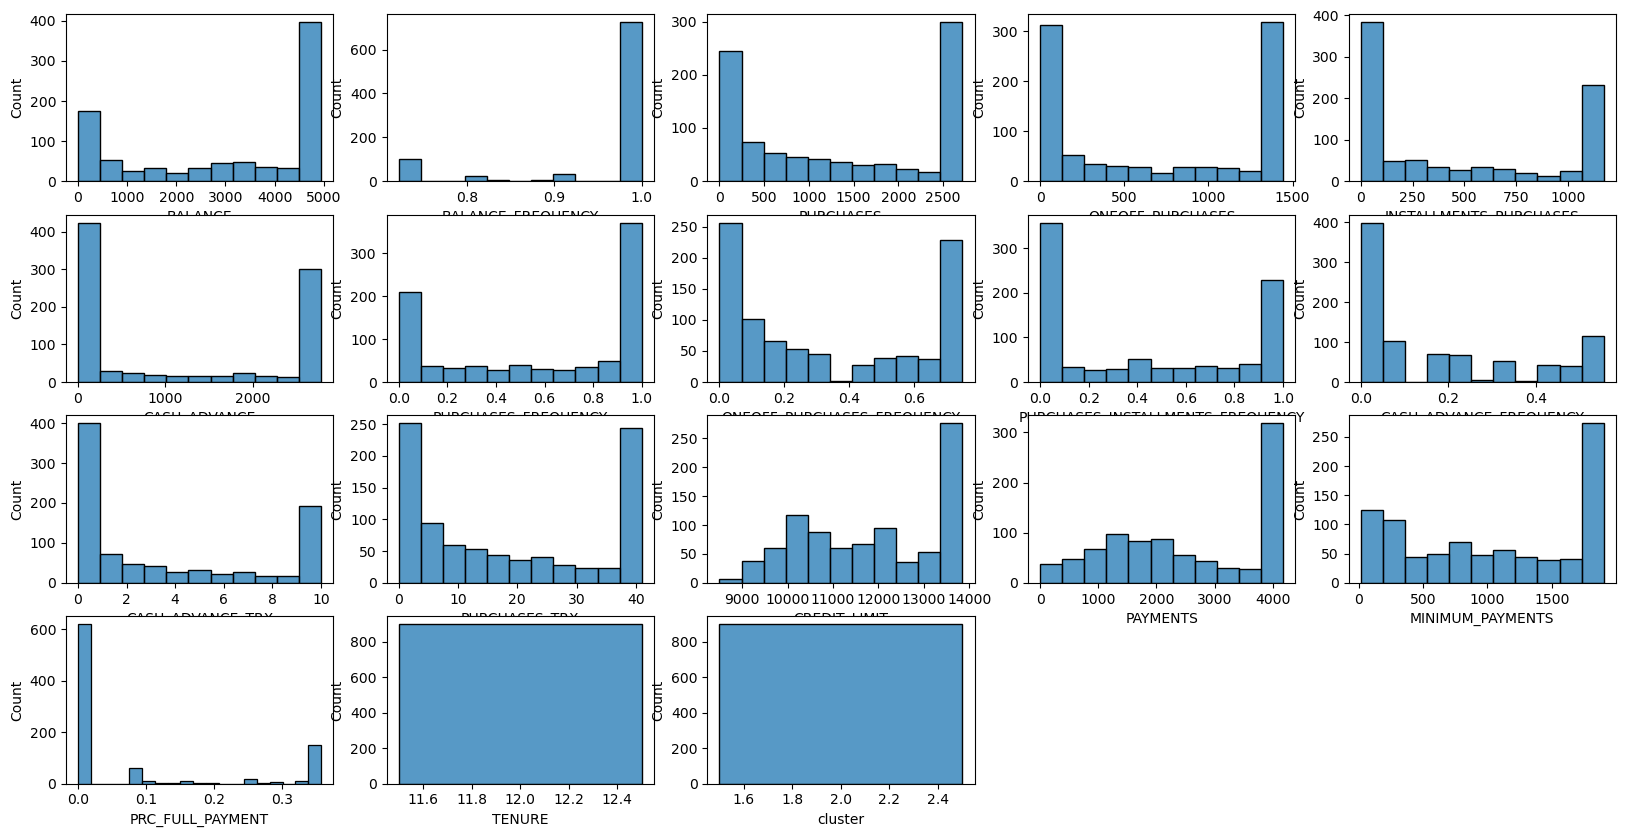

In [48]:
df_clusters2 = df_clusters[(df_clusters['cluster'] == 2)]
plt.figure(num=1, figsize=(20, 10))


for i in enumerate(df_clusters1):
    plt.subplot(4,5 ,i[0]+1)
    sns.histplot(df_clusters2[i[1]])

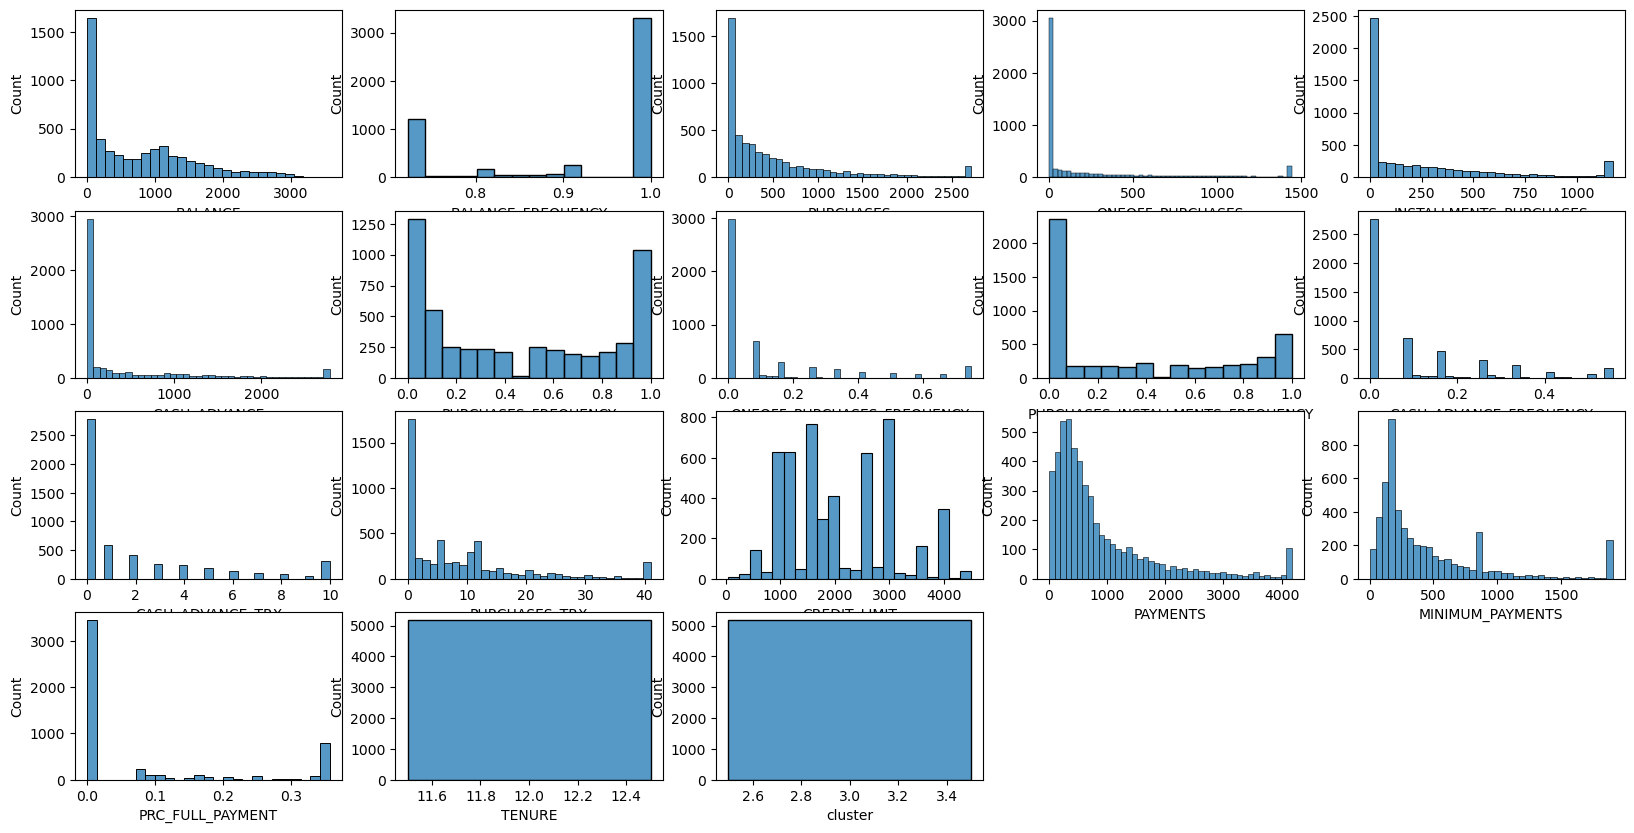

In [49]:
df_clusters3 = df_clusters[(df_clusters['cluster'] == 3)]
plt.figure(num=1, figsize=(20, 10))


for i in enumerate(df_clusters1):
    plt.subplot(4,5 ,i[0]+1)
    sns.histplot(df_clusters3[i[1]])